# Project's Links

Link code (this notebook): https://colab.research.google.com/drive/1cu6pbA_kRzz6Ua-QtmJYgWukRsnfl8MN?usp=sharing

GitHub Repo: https://github.com/raonsb/Credit-Risk-Prediction

Project explanation video: https://youtu.be/mr-wN72EaLY

# Import Library

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

# Set style visualisasi
sns.set_style("whitegrid")

# Load Dataset

In [40]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
460906,460906,10444668,12316816,12250,12250,12250.0,36 months,10.99,401.00,B,B2,Administrative Support,1 year,RENT,40000.0,Not Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,941xx,CA,21.99,0.0,Jul-03,0.0,NaN,NaN,12.0,0.0,3624,15.9,21.0,w,4537.05,4537.05,9624.00,9624.00,7712.95,1911.05,0.0,0.0,0.0,Jan-16,401.00,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,197.0,41063.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22800.0,NaN,NaN,NaN
172337,172337,3146145,3858394,9000,9000,9000.0,36 months,14.33,309.05,C,C1,Vintage Estates,10+ years,RENT,37500.0,Not Verified,Jan-13,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,954xx,CA,10.78,0.0,Mar-96,0.0,NaN,NaN,8.0,0.0,9728,69.0,14.0,w,0.00,0.00,5871.95,5871.95,4270.78,1601.17,0.0,0.0,0.0,Aug-14,309.05,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,9728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14100.0,NaN,NaN,NaN
112846,112846,6328098,7859626,12000,12000,12000.0,36 months,12.35,400.59,B,B4,city of maryland heights,10+ years,MORTGAGE,54000.0,Not Verified,Jul-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 07/14/13 > To pay off bill...,debt_consolidation,pay off bills and bilud a deck on the ho,631xx,MO,21.64,0.0,Nov-01,3.0,NaN,NaN,14.0,0.0,14101,67.5,24.0,f,2692.74,2692.74,11615.78,11615.78,9307.26,2308.52,0.0,0.0,0.0,Jan-16,400.59,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,178352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20900.0,NaN,NaN,NaN
388618,388618,16341889,18444373,13250,13250,13250.0,60 months,12.99,301.42,C,C1,CUSTOMER SERVICE,9 years,MORTGAGE,44000.0,Not Verified,May-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,245xx,VA,13.04,1.0,Jan-87,1.0,17.0,NaN,12.0,0.0,13441,66.2,30.0,w,9743.18,9743.18,6031.98,6031.98,3506.82,2525.16,0.0,0.0,0.0,Jan-16,305.00,Feb-16,Jan-16,0.0,30.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,121337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20300.0,NaN,NaN,NaN
329137,329137,23884221,26257039,19875,19875,19875.0,60 months,20.99,537.58,E,E4,Project Managers,9 years,RENT,90000.0,Source Verified,Aug-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,913xx,CA,13.65,0.0,Apr-07,1.0,46.0,NaN,7.0,0.0,14239,88.4,13.0,w,0.00,0.00,23444.13,23444.13,19875.00,3569.13,0.0,0.0,0.0,Jun-15,18605.91,NaN,Jun-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16100.0,NaN,NaN,NaN


# Data Understanding

## Basic Understanding

In [41]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Terlihat belum terdapat kolom target/labelnya. Akan dibuat nanti.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Terlihat terdapat 75 kolom dan 466.285 baris data, yang terdiri dari 48 kolom bertipe data float, 5 kolom bertipe data int, dan 22 kolom bertipe data object.

In [43]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Terdapat kolom yang tidak relevan untuk dianalisis, maka akan dihapus: tidak bernama (Unnamed) yang hanya sebagai penomoron dari baris data. Ini akan dihapus nanti.

In [44]:
df["loan_status"].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


## Checking Missing Values

In [45]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0


In [46]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

print(missing_df)


                                                  Column  Missing Percentage
max_bal_bc                                    max_bal_bc          100.000000
open_rv_24m                                  open_rv_24m          100.000000
inq_fi                                            inq_fi          100.000000
open_rv_12m                                  open_rv_12m          100.000000
il_util                                          il_util          100.000000
mths_since_rcnt_il                    mths_since_rcnt_il          100.000000
total_bal_il                                total_bal_il          100.000000
open_il_24m                                  open_il_24m          100.000000
open_il_12m                                  open_il_12m          100.000000
open_il_6m                                    open_il_6m          100.000000
open_acc_6m                                  open_acc_6m          100.000000
dti_joint                                      dti_joint          100.000000

Terlihat banyak kolom dengan persentase missing values yang besar, yaitu lebih dari 50%.

## Checking Duplicate Values

In [47]:
df.duplicated().sum()

np.int64(0)

Terlihat tidak ada data yang duplikat, maka tidak perlu hanling duplicate values.

# Data Preparation 1

Berikut list data preparation yang akan dilakukan:
1. Membuat Kolom Target
2. Removing Irrelevant Features
3. Handle Missing Values
4. Changing Data Type
5. Feature Engineering
6. Train Test Split
7. Handling Imbalance Data
8. Standarization

Handling imbalance perlu dikakukan sesudah split train test data guna mencegah terjadinya data leakage. Hal ini dikarenakan jika dilakukan sebelum split data, data sintetis yang dibuat dari data testing bisa masuk ke data training (misal melakukan oversampling dengan teknik SMOTE). Model akan "melihat" informasi dari data testing selama pelatihan, sehingga performanya menjadi bias.


## 1-Membuat Kolom Target

In [48]:
def classify_credit_risk(status):
    high_risk_status = ['Charged Off', 'Default', 'Late (31-120 days)',
                        'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']

    low_risk_status = ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid','In Grace Period']

    if status in high_risk_status:
        return "Bad"  # High Risk → Bad
    elif status in low_risk_status:
        return "Good"  # Low Risk → Good
    else:
        return np.nan  # Hapus nanti

df['credit_risk'] = df['loan_status'].apply(classify_credit_risk)

In [49]:
df['credit_risk'].value_counts()

,count
credit_risk,
Good,414099
Bad,52186


In [50]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,credit_risk
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good


## 2-Removing Irrelevant Features

In [51]:
df['policy_code'].value_counts()

,count
policy_code,
1,466285


In [52]:
df['application_type'].value_counts()

,count
application_type,
INDIVIDUAL,466285


Kolom yang Tidak Relevan atau Redundant:
    
    1. Unnamed: 0 → Hanya indeks, tidak diperlukan.
    2. id & member_id → ID unik yang tidak berkontribusi pada analisis atau model prediksi.
    3. url → Link tidak digunakan dalam analisis.
    4. desc → Deskripsi teks panjang, tidak digunakan.
    5. zip_code → Data kode pos biasanya tidak berpengaruh signifikan dalam analisis pinjaman.
    6. policy_code → Hanya memiliki satu nilai unik, sehingga tidak informatif.
    7. application_type → Semua data memiliki nilai yang sama, bisa dihapus.
    8. emp_title → Deskripsi teks yang tidak diperlukan
    9. title → Deskripsi teks yang tidak diperlukan
    10. loan_status → Hanya digunakan untuk menentukan kolom target, setalah digunakan maka akan dihapus guna menghindari korelasi yang sangat tinggi dengan kolom credit_risk nanti


In [53]:
drop_cols = [
    "Unnamed: 0", "id", "member_id", "url", "desc", "zip_code", "policy_code",
    "application_type", "emp_title", "title", "loan_status"
]

df = df.drop(columns=drop_cols)

## 3-Handle Missing Values

Kolom dengan Banyak Missing Values (≥50%)

    Kolom-kolom ini tidak memiliki data sama sekali, jadi bisa langsung dihapus (100% missing values):

    1. max_bal_bc
    2. open_rv_24m
    3. inq_fi
    4. open_rv_12m
    5. il_util
    6. mths_since_rcnt_il
    7. total_bal_il
    8. open_il_24m
    9. open_il_12m
    10. open_il_6m
    11. open_acc_6m
    12. dti_joint
    13. annual_inc_joint
    14. verification_status_joint
    15. all_util
    16. inq_last_12m
    17. total_cu_tl

    ≥50%:
    
    1. mths_since_last_record (87.56%)
    2. mths_since_last_major_derog (78.77%)
    3. mths_since_last_delinq (53.69%)

In [54]:
drop_cols = [
    "max_bal_bc", "open_rv_24m", "inq_fi", "open_rv_12m", "il_util", "mths_since_rcnt_il",
    "total_bal_il", "open_il_24m", "open_il_12m", "open_il_6m", "open_acc_6m", "dti_joint",
    "annual_inc_joint", "verification_status_joint", "all_util", "inq_last_12m", "total_cu_tl",
    "mths_since_last_record", "mths_since_last_major_derog", "mths_since_last_delinq"
]

df = df.drop(columns=drop_cols)

In [55]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

print(missing_df)

                                                Column  Missing Percentage
next_pymnt_d                              next_pymnt_d           48.728567
total_rev_hi_lim                      total_rev_hi_lim           15.071469
tot_coll_amt                              tot_coll_amt           15.071469
tot_cur_bal                                tot_cur_bal           15.071469
emp_length                                  emp_length            4.505399
last_pymnt_d                              last_pymnt_d            0.080637
revol_util                                  revol_util            0.072917
collections_12_mths_ex_med  collections_12_mths_ex_med            0.031097
last_credit_pull_d                  last_credit_pull_d            0.009007
inq_last_6mths                          inq_last_6mths            0.006219
earliest_cr_line                      earliest_cr_line            0.006219
open_acc                                      open_acc            0.006219
acc_now_delinq           

In [56]:
# Mengonversi next_pymnt_d ke Format datetime
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')

## mengisi kolom next_pymnt_d dengan median
df['next_pymnt_d'] = df['next_pymnt_d'].fillna(df['next_pymnt_d'].median())

In [57]:
# Mengisi kolom tot_coll_amt, tot_cur_bal, total_rev_hi_lim yang memiliki missing value >15%, dengan median
df['tot_coll_amt']= df['tot_coll_amt'].fillna(df['tot_coll_amt'].median())
df['tot_cur_bal']= df['tot_cur_bal'].fillna(df['tot_cur_bal'].median())
df['total_rev_hi_lim']= df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median())

In [58]:
# menghapus sisa baris data yang memiliki missing value
df.dropna(inplace = True)
df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0


## 4-Changing Data Type

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444451 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   444451 non-null  int64         
 1   funded_amnt                 444451 non-null  int64         
 2   funded_amnt_inv             444451 non-null  float64       
 3   term                        444451 non-null  object        
 4   int_rate                    444451 non-null  float64       
 5   installment                 444451 non-null  float64       
 6   grade                       444451 non-null  object        
 7   sub_grade                   444451 non-null  object        
 8   emp_length                  444451 non-null  object        
 9   home_ownership              444451 non-null  object        
 10  annual_inc                  444451 non-null  float64       
 11  verification_status         444451 non-null 

In [60]:
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f"Kolom: {col}")
    print(df[col].head())  # Menampilkan 5 baris pertama, atau kurang jika kolomnya lebih pendek
    print("-" * 20)

Kolom: term
0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object
--------------------
Kolom: grade
0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object
--------------------
Kolom: sub_grade
0    B2
1    C4
2    C5
3    C1
4    B5
Name: sub_grade, dtype: object
--------------------
Kolom: emp_length
0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object
--------------------
Kolom: home_ownership
0    RENT
1    RENT
2    RENT
3    RENT
4    RENT
Name: home_ownership, dtype: object
--------------------
Kolom: verification_status
0           Verified
1    Source Verified
2       Not Verified
3    Source Verified
4    Source Verified
Name: verification_status, dtype: object
--------------------
Kolom: issue_d
0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object
--------------------
Kolom: pymnt_plan
0    n
1    n
2    n
3    n
4    n
Name: pym

In [61]:
# Mengubah kolom ke format datetime
date_columns = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%b-%y')  # Mengubah ke datetime

In [62]:
# mengonversi data kategorikal menjadi numerik untuk kolom term

df['term'] = df['term'].str.extract('(\d+)').astype(float)  # Ambil angka dari string

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444451 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   444451 non-null  int64         
 1   funded_amnt                 444451 non-null  int64         
 2   funded_amnt_inv             444451 non-null  float64       
 3   term                        444451 non-null  float64       
 4   int_rate                    444451 non-null  float64       
 5   installment                 444451 non-null  float64       
 6   grade                       444451 non-null  object        
 7   sub_grade                   444451 non-null  object        
 8   emp_length                  444451 non-null  object        
 9   home_ownership              444451 non-null  object        
 10  annual_inc                  444451 non-null  float64       
 11  verification_status         444451 non-null 

# EDA (Exploratory Data Analysis)

## Mengecek Distribusi Data Kategorikal

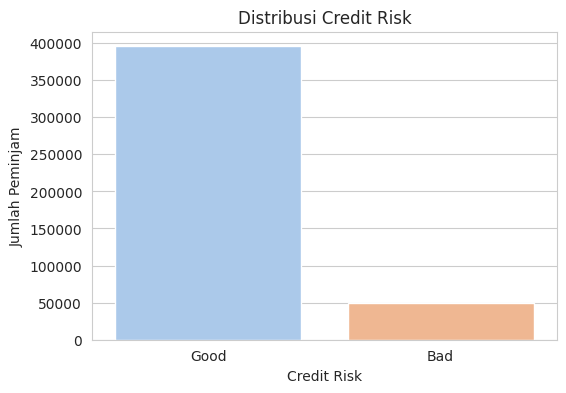

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(x='credit_risk', data=df, palette='pastel')
plt.title('Distribusi Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Jumlah Peminjam')
plt.show()


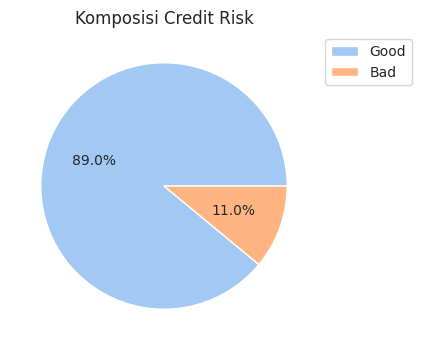

In [65]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(6, 4))
df['credit_risk'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, labels=None)
plt.title('Komposisi Credit Risk')
plt.ylabel('')

# Legend di pojok kanan atas, di luar pie chart
plt.legend(labels=['Good', 'Bad'], bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

terlihat dari visualisasi data di atas bahwa adanya ketimpangan distribusi data good dan bad, data credit risk yang good lebih banyak dari yang bad. perlu dilakukan handling imbalance agar kualitas model terjaga

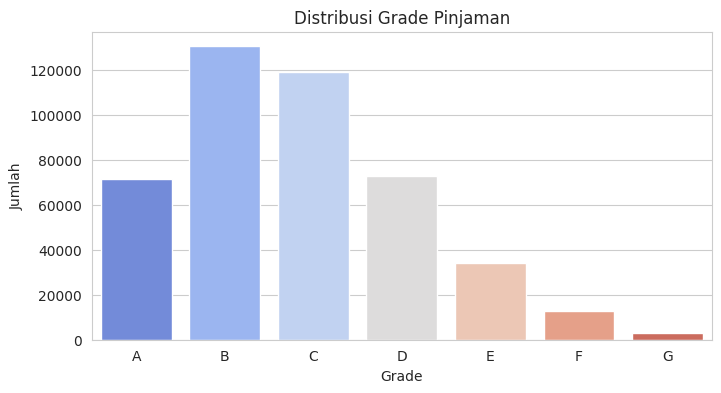

In [66]:
plt.figure(figsize=(8, 4))
sns.countplot(x='grade', data=df, order=sorted(df['grade'].unique()), palette='coolwarm')
plt.title('Distribusi Grade Pinjaman')
plt.xlabel('Grade')
plt.ylabel('Jumlah')
plt.show()

terlihat distribusi grade pinjaman tertinggi adalah B, lalu diikuti C dan D. ini menandakan mayoritas peminjam berada pada kelas kredit menengah. Grade B, C, dan D umumnya diberikan kepada peminjam yang tidak memiliki skor kredit yang sangat tinggi (A), tetapi juga tidak terlalu buruk (E, F, G).

Ini menunjukkan bahwa mayoritas peminjam berada di kelas kredit menengah, artinya mereka bukan peminjam yang paling aman, tetapi juga bukan yang paling berisiko.

## Mengecek Distribusi Data Numerik

In [67]:
# Salin kolom loan_amnt saja untuk diproses
loan_amnt_temp = df['loan_amnt'].copy()

# Buat bin dan label
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
labels = ['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K', '25K-30K', '30K-35K', '35K-40K']

# Buat kategori pinjaman dari salinan kolom
loan_range = pd.cut(loan_amnt_temp, bins=bins, labels=labels, right=False)

# Hitung distribusi berdasarkan kategori
loan_distribution = loan_range.value_counts().sort_index().reset_index()
loan_distribution.columns = ['Range Jumlah Pinjaman ($)', 'Jumlah Data']

# Tampilkan tabel
print(loan_distribution)



  Range Jumlah Pinjaman ($)  Jumlah Data
0                      0-5K        39416
1                    5K-10K       103058
2                   10K-15K       108695
3                   15K-20K        76196
4                   20K-25K        57845
5                   25K-30K        28433
6                   30K-35K        14574
7                   35K-40K        16234


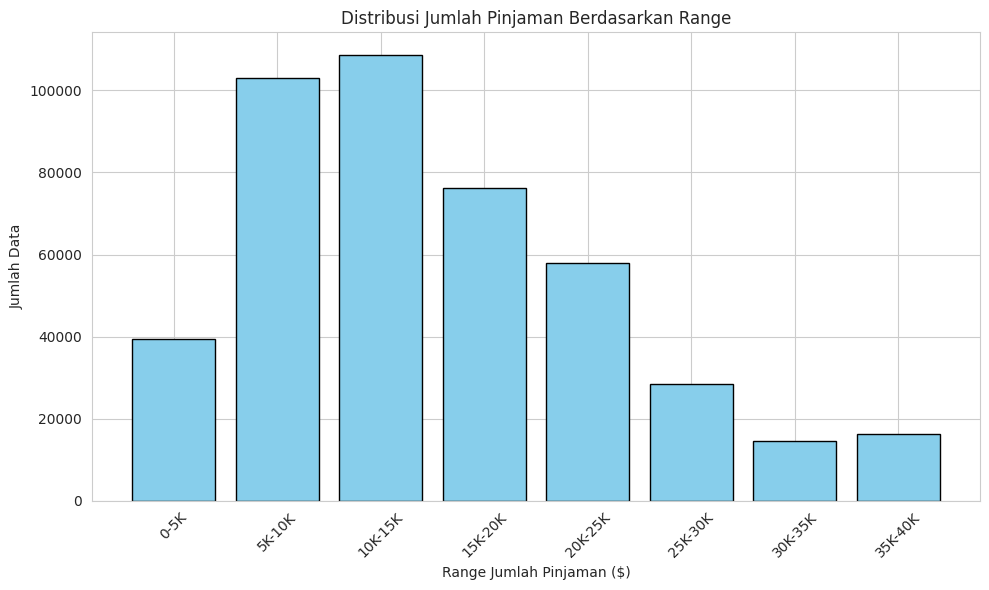

In [68]:
# Ambil data dari tabel
ranges = loan_distribution['Range Jumlah Pinjaman ($)']
jumlah_data = loan_distribution['Jumlah Data']

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(ranges, jumlah_data, color='skyblue', edgecolor='black')
plt.xlabel('Range Jumlah Pinjaman ($)')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Pinjaman Berdasarkan Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribusi bersifat right-skewed (positively skewed), mengindikasikan konsentrasi data pada jumlah pinjaman kecil hingga sedang ($5.000 – $15.000), dengan sebagian kecil peminjam mengambil pinjaman dalam jumlah besar.

Jumlah peminjam menurun signifikan seiring meningkatnya nilai pinjaman di atas $20.000, menandakan jumlah besar lebih jarang diajukan.

Fokuskan evaluasi risiko lebih ketat pada pinjaman > $20.000, karena walaupun jumlahnya lebih sedikit, nilai kerugiannya jauh lebih besar jika terjadi gagal bayar.

## Mengecek Korelasi Antar Variabel Numerik

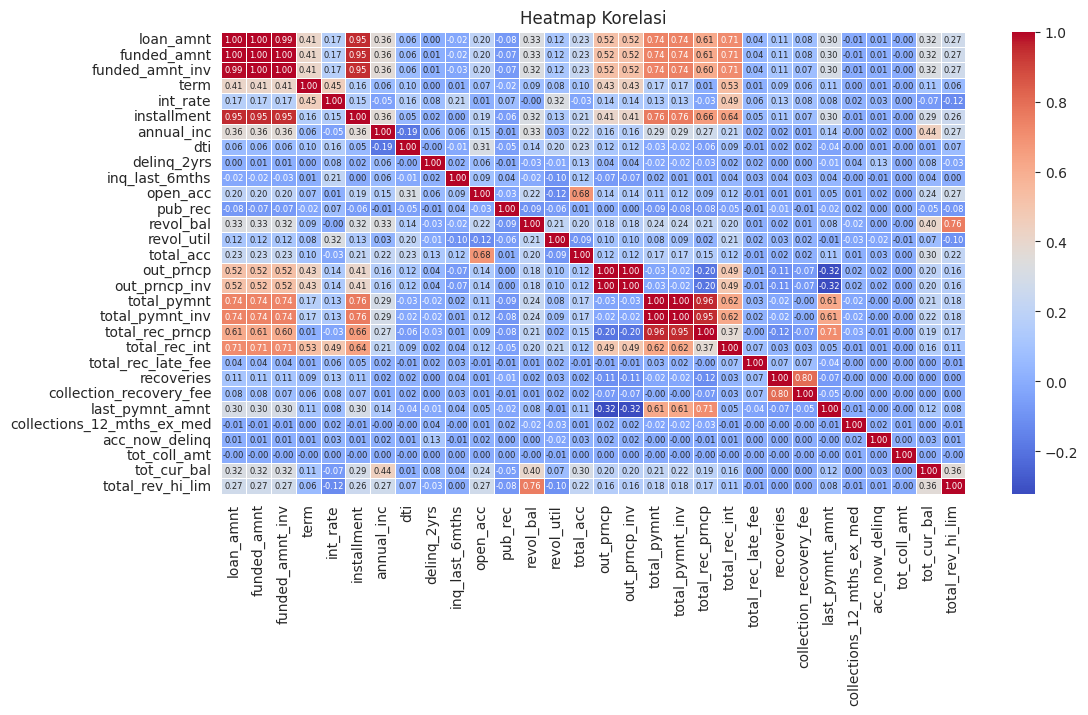

In [69]:
df_numeric = df.select_dtypes(include=['number'])  # Hanya pilih kolom numerik
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, linewidths=0.5, fmt=".2f", annot_kws={'size': 6})
plt.title('Heatmap Korelasi')
plt.show()


Terlihat beberapa kolom memiliki korelasi yang sangat tinggi dengan kolom lainnya (>=0.8), , seperti loan_amnt vs funded_amnt (1.00) dan out_prncp vs out_prncp_inv (1.00).

Perlu di drop salah satu kolom yang sangat berkorelasi tinggi karena informasi yang dikandungnya sangat mirip atau hampir identik, sehingga bisa menimbulkan redundansi dalam analisis atau model prediktif.

Drop dilakukan pada Data Prep 2.

## Mengecek Tren Jumlah Pinjaman Berdasarkan Waktu

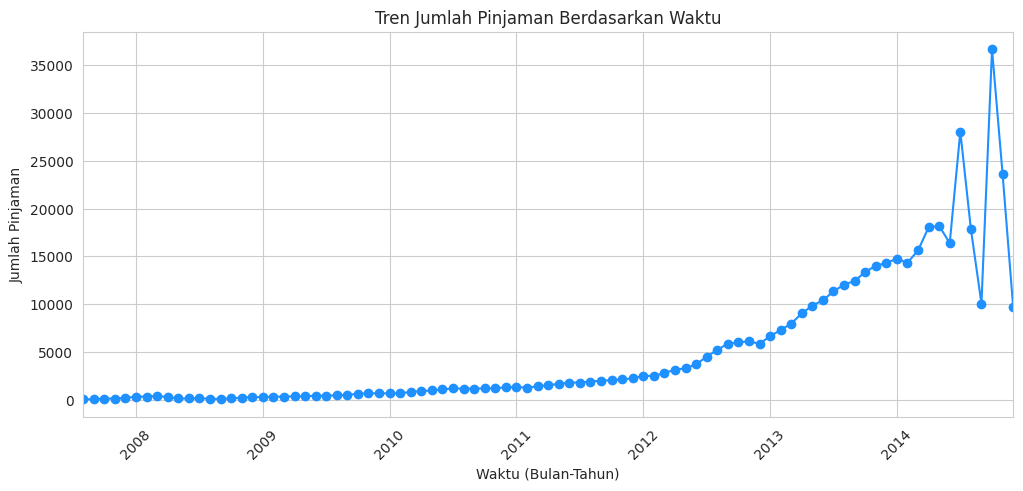

In [70]:
plt.figure(figsize=(12, 5))
df.groupby(df['issue_d'].dt.to_period("M")).size().plot(kind='line', marker='o', color='dodgerblue')
plt.title('Tren Jumlah Pinjaman Berdasarkan Waktu')
plt.xlabel('Waktu (Bulan-Tahun)')
plt.ylabel('Jumlah Pinjaman')
plt.xticks(rotation=45)
plt.show()


In [71]:
# Hitung jumlah pinjaman per bulan (berdasarkan issue_d)
loan_trend_table = df.groupby(df['issue_d'].dt.to_period("M")).size().reset_index(name='jumlah_pinjaman')

# Ubah format period menjadi datetime (optional, agar lebih rapi)
loan_trend_table['issue_d'] = loan_trend_table['issue_d'].astype(str)

# Tampilkan tabel tren jumlah pinjaman per bulan
print(loan_trend_table)

    issue_d  jumlah_pinjaman
0   2007-08               21
1   2007-09               50
2   2007-10              103
3   2007-11              112
4   2007-12              171
5   2008-01              305
6   2008-02              305
7   2008-03              397
8   2008-04              257
9   2008-05              115
10  2008-06              123
11  2008-07              139
12  2008-08               99
13  2008-09               57
14  2008-10              122
15  2008-11              208
16  2008-12              252
17  2009-01              266
18  2009-02              301
19  2009-03              323
20  2009-04              330
21  2009-05              357
22  2009-06              403
23  2009-07              409
24  2009-08              446
25  2009-09              505
26  2009-10              601
27  2009-11              654
28  2009-12              655
29  2010-01              650
30  2010-02              653
31  2010-03              805
32  2010-04              888
33  2010-05   

Jumlah pinjaman tumbuh perlahan dari tahun 2007 hingga pertengahan 2012, menunjukkan fase adopsi awal platform pinjaman.

Terjadi lonjakan tajam pada tahun 2013 dan terutama 2014, mencerminkan ekspansi besar-besaran atau meningkatnya kepercayaan pengguna.

Tahun 2014 menunjukkan pola naik-turun ekstrem, menandakan kemungkinan perubahan kebijakan, promosi besar, atau faktor eksternal lainnya.

# Data Preparation 2

## 5-Feature Engineering

### Multicollinearity Reduction

Dilakukan drop kolom yang memiliki relasi sangat tinggi dengan kolom lainnya (relasi >= 0.8).

Dipilih salah satu kolom yang representatif dalam pasangan kolom yang berelasi tersebut. Contoh: loan_amnt, funded_amnt, dan funded_amnt_inv → hanya loan_amnt yang disimpan.

In [72]:
# Hitung korelasi antar kolom numerik
cor_matrix = df.corr(numeric_only=True).abs()

# Temukan pasangan kolom dengan korelasi >= 0.8 (tanpa membatasi upper/lower triangle)
high_corr_pairs = []
for i in range(len(cor_matrix.columns)):
    for j in range(i + 1, len(cor_matrix.columns)):
        col1 = cor_matrix.columns[i]
        col2 = cor_matrix.columns[j]
        corr_val = cor_matrix.iloc[i, j]
        if corr_val >= 0.8:
            high_corr_pairs.append((col1, col2, corr_val))

# 4. Tampilkan pasangan dengan korelasi tinggi
print("Kolom-kolom dengan korelasi >= 0.8:")
for col1, col2, val in high_corr_pairs:
    print(f"{col1} vs {col2} | Korelasi: {val:.2f}")

# 5. Tentukan kolom yang akan di-drop (misal drop col2 dari tiap pasangan)
columns_to_drop = set()
for col1, col2, _ in high_corr_pairs:
    if col2 not in columns_to_drop:
        columns_to_drop.add(col2)

print("\nKolom yang akan di-drop:")
print(columns_to_drop)

Kolom-kolom dengan korelasi >= 0.8:
loan_amnt vs funded_amnt | Korelasi: 1.00
loan_amnt vs funded_amnt_inv | Korelasi: 0.99
loan_amnt vs installment | Korelasi: 0.95
funded_amnt vs funded_amnt_inv | Korelasi: 1.00
funded_amnt vs installment | Korelasi: 0.95
funded_amnt_inv vs installment | Korelasi: 0.95
out_prncp vs out_prncp_inv | Korelasi: 1.00
total_pymnt vs total_pymnt_inv | Korelasi: 1.00
total_pymnt vs total_rec_prncp | Korelasi: 0.96
total_pymnt_inv vs total_rec_prncp | Korelasi: 0.95

Kolom yang akan di-drop:
{'out_prncp_inv', 'total_rec_prncp', 'funded_amnt_inv', 'funded_amnt', 'installment', 'total_pymnt_inv'}


In [73]:
drop_columns = [
    'funded_amnt',
    'funded_amnt_inv',
    'installment',
    'out_prncp_inv',
    'total_pymnt_inv',
    'total_rec_prncp'
]
df = df.drop(columns=drop_columns)

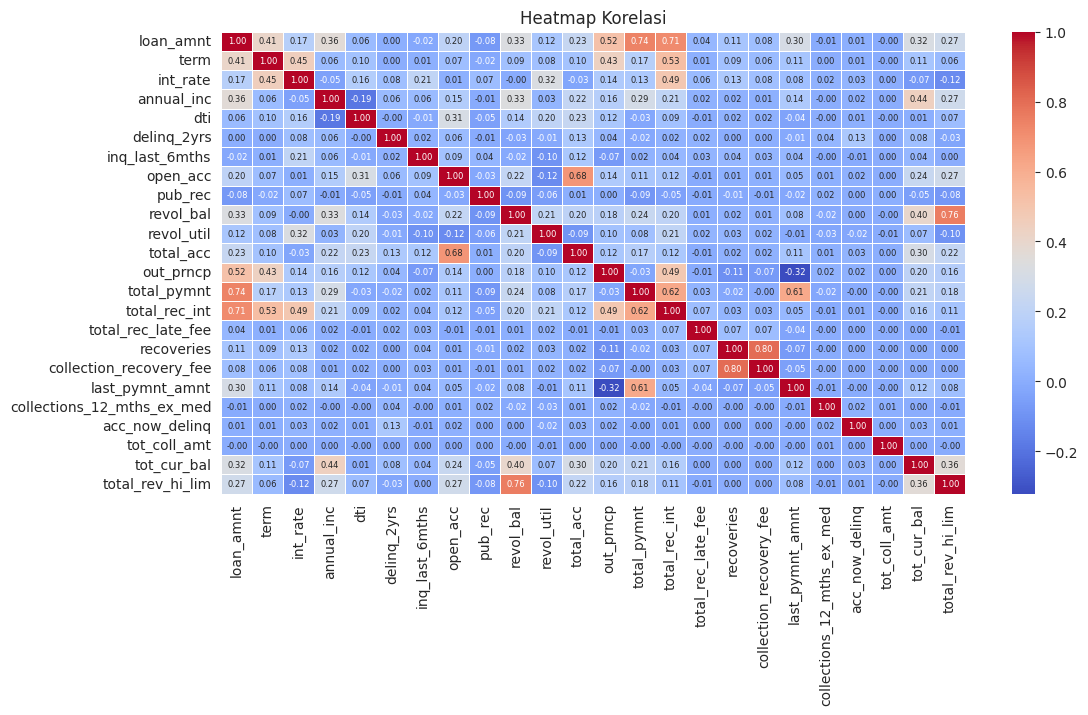

In [74]:
df_numeric = df.select_dtypes(include=['number'])  # Hanya pilih kolom numerik
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, linewidths=0.5, fmt=".2f", annot_kws={'size': 6})
plt.title('Heatmap Korelasi')
plt.show()

In [75]:
df = df.drop('collection_recovery_fee', axis=1)

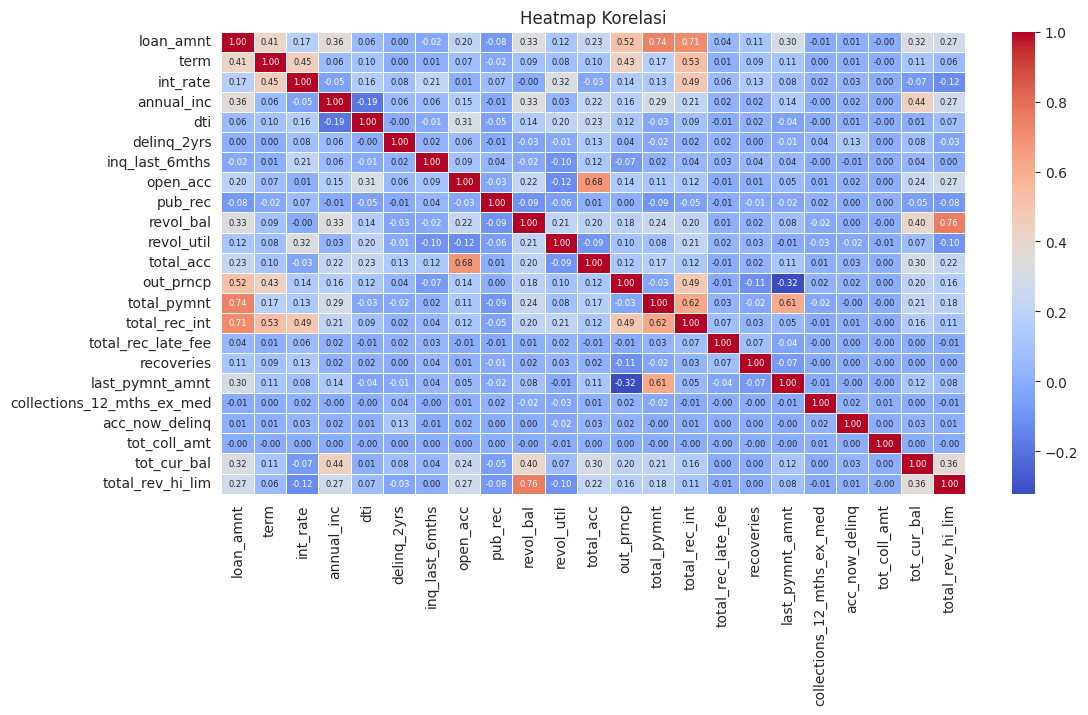

In [76]:
df_numeric = df.select_dtypes(include=['number'])  # Hanya pilih kolom numerik
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, linewidths=0.5, fmt=".2f", annot_kws={'size': 6})
plt.title('Heatmap Korelasi')
plt.show()

### Ordinal Encoding

Dilakukan encoding pada variabel kategorikal untuk mengubah data non-numerik menjadi format yang dapat diproses oleh model ML.

Diterapkan Ordinal Encoding pada kolom dengan hierarki jelas: "credit_risk" (0 = Bad, 1 = Good), "grade", "sub_grade", "emp_length", dan "verification_status" untuk mempertahankan urutan logika nilai kategorinya.

Digunakan Label Encoding pada kolom tanpa hierarki ("home_ownership", "purpose", "addr_state", "initial_list_status", "pymnt_plan") yang hanya membutuhkan transformasi ke nilai numerik tanpa makna urutan.

In [77]:
df.head(5)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_risk
0,5000,36.0,10.65,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,n,credit_card,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,5861.071414,861.07,0.00,0.00,2015-01-01,171.62,2016-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,Good
1,2500,60.0,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,car,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,1008.710000,435.17,0.00,117.08,2013-04-01,119.66,2016-02-01,2013-09-01,0.0,0.0,0.0,81539.0,22800.0,Bad
2,2400,36.0,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,small_business,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,3003.653644,603.65,0.00,0.00,2014-06-01,649.91,2016-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,Good
3,10000,36.0,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,other,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,12226.302210,2209.33,16.97,0.00,2015-01-01,357.48,2016-02-01,2015-01-01,0.0,0.0,0.0,81539.0,22800.0,Good
4,3000,60.0,12.69,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,n,other,OR,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,3242.170000,1009.07,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,Good


In [78]:
from sklearn.preprocessing import OrdinalEncoder

# Fitur dengan urutan yang jelas
ordinal_features = ["credit_risk", "grade", "sub_grade", "emp_length", "verification_status"]

# Mapping untuk ordinal encoding
ordinal_mapping = {
    "credit_risk": {"Bad": 0, "Good": 1},
    "grade": {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6},
    "sub_grade": {f"{g}{n}": i for i, (g, n) in enumerate([(g, n) for g in "ABCDEFG" for n in range(1, 6)])},
    "emp_length": {"< 1 year": 0, "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5,
                   "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9, "10+ years": 10},
    "verification_status": {"Not Verified": 0, "Source Verified": 1, "Verified": 2}
}

# Ubah kategori ke nilai numerik
for col, mapping in ordinal_mapping.items():
    df[col] = df[col].map(mapping)


### Label Encoding

In [79]:
label_features = ["home_ownership", "purpose", "addr_state", "initial_list_status", "pymnt_plan", ]

for feature in label_features:
  le = LabelEncoder()
  df[feature] = le.fit_transform(df[feature])


In [80]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_risk
0,5000,36.0,10.65,1,6,10,5,24000.0,2,2011-12-01,0,1,3,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,0,0.0,5861.071414,861.07,0.00,0.00,2015-01-01,171.62,2016-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,1
1,2500,60.0,15.27,2,13,0,5,30000.0,1,2011-12-01,0,0,10,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687,9.4,4.0,0,0.0,1008.710000,435.17,0.00,117.08,2013-04-01,119.66,2016-02-01,2013-09-01,0.0,0.0,0.0,81539.0,22800.0,0
2,2400,36.0,15.96,2,14,10,5,12252.0,0,2011-12-01,0,11,14,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,0,0.0,3003.653644,603.65,0.00,0.00,2014-06-01,649.91,2016-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,1
3,10000,36.0,13.49,2,10,10,5,49200.0,1,2011-12-01,0,9,4,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598,21.0,37.0,0,0.0,12226.302210,2209.33,16.97,0.00,2015-01-01,357.48,2016-02-01,2015-01-01,0.0,0.0,0.0,81539.0,22800.0,1
4,3000,60.0,12.69,1,9,1,5,80000.0,1,2011-12-01,0,9,36,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783,53.9,38.0,0,766.9,3242.170000,1009.07,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444451 entries, 0 to 466284
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   444451 non-null  int64         
 1   term                        444451 non-null  float64       
 2   int_rate                    444451 non-null  float64       
 3   grade                       444451 non-null  int64         
 4   sub_grade                   444451 non-null  int64         
 5   emp_length                  444451 non-null  int64         
 6   home_ownership              444451 non-null  int64         
 7   annual_inc                  444451 non-null  float64       
 8   verification_status         444451 non-null  int64         
 9   issue_d                     444451 non-null  datetime64[ns]
 10  pymnt_plan                  444451 non-null  int64         
 11  purpose                     444451 non-null 

## 6-Train Test Split

menghapus kolom dengan tipe datetime karena tidak relevan untuk model

In [82]:
df_original = df.copy()
df = df.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], axis=1)

dilakukan splitting dataset latih dan uji untuk melatih model

In [83]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=["credit_risk"])  # Semua fitur kecuali target
y = df["credit_risk"]  # Target

In [84]:
# Membagi dataset menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan bentuk dataset setelah split
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (355560, 32) (355560,)
Test set: (88891, 32) (88891,)


## 7-Handling Imbalance Data

Dilakukan handling imbalance data dengan teknik SMOTE (synthetic minority over-sampling technique) untuk mengatasi ketimpangan jumlah data target dan fitur pada dataset training.

SMOTE (atau teknik oversampling/undersampling lainnya) hanya diterapkan pada data training (X_train, y_train). Data testing (X_test, y_test) dibiarkan apa adanya (imbalance) untuk merepresentasikan distribusi data di dunia nyata.

In [85]:
from imblearn.over_sampling import SMOTE

# 2. Tangani Imbalance Data di Data Latih dengan SMOTE (contoh oversampling)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Cek distribusi sebelum dan sesudah SMOTE
print("Distribusi y sebelum SMOTE:\n", y_train.value_counts())
print("Distribusi y setelah SMOTE:\n", y_train_balanced.value_counts())

Distribusi y sebelum SMOTE:
 credit_risk
1    316441
0     39119
Name: count, dtype: int64
Distribusi y setelah SMOTE:
 credit_risk
0    316441
1    316441
Name: count, dtype: int64


## 8-Standarization

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Data Modelling

In [87]:
!pip install xgboost

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

In [89]:
def print_evaluation_metrics(y_true, y_pred, model_name="Model"):
    """
    Menampilkan metrik evaluasi untuk model klasifikasi.

    Args:
        y_true: Nilai target sebenarnya.
        y_pred: Nilai target yang diprediksi.
        model_name: Nama model (opsional).
    """

    print(f"--- {model_name} ---")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true,y_pred))
    print("Precision:", precision_score(y_true,y_pred))
    print("Recall:", recall_score(y_true,y_pred))
    print("F1 Score:", f1_score(y_true,y_pred))


    print("-" * 30)

## Logistic Regression

In [90]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train_balanced)

LogisticRegression(random_state=42)

In [91]:
y_pred_lr = model_lr.predict(X_test_scaled)
print_evaluation_metrics(y_test, y_pred_lr, "Logistic Regression")

--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      9780
           1       0.98      0.98      0.98     79111

    accuracy                           0.97     88891
   macro avg       0.91      0.91      0.91     88891
weighted avg       0.97      0.97      0.97     88891

Confusion Matrix:
 [[ 8232  1548]
 [ 1481 77630]]
Accuracy: 0.9659245592917168
ROC AUC Score: 0.9114986297500918
Precision: 0.9804491146530602
Recall: 0.9812794680891406
F1 Score: 0.9808641156365888
------------------------------


## Decision Tree

In [92]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_scaled, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [93]:
y_pred_dt = model_dt.predict(X_test_scaled)
print_evaluation_metrics(y_test, y_pred_dt, "Decision Tree")

--- Decision Tree ---
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      9780
           1       0.98      0.97      0.98     79111

    accuracy                           0.96     88891
   macro avg       0.88      0.91      0.89     88891
weighted avg       0.96      0.96      0.96     88891

Confusion Matrix:
 [[ 8339  1441]
 [ 2448 76663]]
Accuracy: 0.9562497890675097
ROC AUC Score: 0.9108573115111823
Precision: 0.9815502407047014
Recall: 0.9690561363147981
F1 Score: 0.9752631746334637
------------------------------


## Random Forest

In [94]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train_balanced)

RandomForestClassifier(random_state=42)

In [95]:
y_pred_rf = model_rf.predict(X_test_scaled)
print_evaluation_metrics(y_test, y_pred_rf, "Random Forest")

--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      9780
           1       0.98      1.00      0.99     79111

    accuracy                           0.98     88891
   macro avg       0.98      0.91      0.94     88891
weighted avg       0.98      0.98      0.98     88891

Confusion Matrix:
 [[ 7997  1783]
 [  191 78920]]
Accuracy: 0.9777930274155989
ROC AUC Score: 0.9076374161602919
Precision: 0.9779066453539521
Recall: 0.9975856707663915
F1 Score: 0.9876481409638705
------------------------------


## Gradient Boosting - XGBoost

In [96]:
model_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # parameter use_label_encoder dan eval_metric ditambahkan di versi terbaru xgboost
model_xgb.fit(X_train_scaled, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [97]:
y_pred_xgb = model_xgb.predict(X_test_scaled)
print_evaluation_metrics(y_test, y_pred_xgb, "XGBoost")

--- XGBoost ---
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      9780
           1       0.98      1.00      0.99     79111

    accuracy                           0.98     88891
   macro avg       0.99      0.92      0.95     88891
weighted avg       0.98      0.98      0.98     88891

Confusion Matrix:
 [[ 8285  1495]
 [   85 79026]]
Accuracy: 0.982225422146224
ROC AUC Score: 0.9230312873018183
Precision: 0.9814334148855578
Recall: 0.9989255602887083
F1 Score: 0.9901022351408238
------------------------------


## K-Nearest Neighbors (KNN)

In [99]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train_balanced)

KNeighborsClassifier()

In [100]:
# Prediksi data uji
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluasi performa model
print_evaluation_metrics(y_test, y_pred_knn, "K-Nearest Neighbors")

--- K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.70      0.51      9780
           1       0.96      0.87      0.91     79111

    accuracy                           0.86     88891
   macro avg       0.68      0.79      0.71     88891
weighted avg       0.90      0.86      0.87     88891

Confusion Matrix:
 [[ 6802  2978]
 [ 9911 69200]]
Accuracy: 0.8550021936978996
ROC AUC Score: 0.785110676079136
Precision: 0.9587408905760758
Recall: 0.8747203296633843
F1 Score: 0.9148054385976508
------------------------------


# Model Evaluation Summary

Logistic Regression menunjukkan performa stabil dengan F1-score tinggi (0.9809) dan keseimbangan precision-recall yang baik, cocok untuk baseline model.

Decision Tree memiliki presisi yang baik namun recall sedikit lebih rendah, sehingga cenderung melewatkan lebih banyak kasus positif dibanding model lain.

Random Forest menghasilkan akurasi dan F1-score tinggi (0.9876) dengan recall hampir sempurna (0.9976), menunjukkan kemampuan klasifikasi yang sangat kuat.

XGBoost adalah model terbaik dengan akurasi tertinggi (98.22%), F1-score tertinggi (0.9901), dan ROC AUC terbaik (0.923), sangat unggul dalam mendeteksi kelas positif.

K-Nearest Neighbors memiliki performa terendah di semua metrik, dengan recall dan akurasi yang jauh di bawah model lain, sehingga kurang direkomendasikan.

# Conclusion

Dari lima model klasifikasi yang dilatih dan dievaluasi, yaitu Logistic Regression, Decision Tree, Random Forest, XGBoost, dan K-Nearest Neighbors, model XGBoost menunjukkan performa terbaik. Hal ini ditunjukkan melalui akurasi yang tinggi serta tingkat kesalahan klasifikasi yang paling rendah dibandingkan model lainnya. Oleh karena itu, XGBoost direkomendasikan sebagai model yang paling optimal untuk digunakan dalam memprediksi risiko kredit.

# Business Recommendation

Gunakan Model XGBoost:
Terapkan model XGBoost untuk prediksi risiko kredit karena memiliki akurasi dan f1-score tertinggi dibandingkan model lain.

Percepat dan Otomatiskan Proses Evaluasi Kredit:
Model XGBoost dapat diintegrasikan ke sistem agar secara otomatis mengevaluasi pengajuan pinjaman; misalnya, jika hasil prediksi menunjukkan credit risk = Bad, sistem langsung memberi notifikasi ke tim analis untuk verifikasi lebih lanjut atau meminta jaminan tambahan.

Kembangkan Strategi Mitigasi Risiko Berdasarkan Data Historis:
Data hasil prediksi saat ini bisa dianalisis lebih lanjut bersama data baru untuk mengembangkan strategi mitigasi, misalnya menolak otomatis pengajuan dari peminjam berprofil serupa dengan catatan gagal bayar atau menyesuaikan bunga pinjaman.